# 1-Data Preprocessing

In [1]:
import pandas as pd
import numpy  as np
import seaborn  as sns
import  matplotlib.pyplot as plt


In [2]:
data = pd.read_excel("Online Retail.xlsx")


In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


###  Missing Data 

In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
data.dropna(subset=["CustomerID"] , inplace= True)

In [7]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


### Duplications

In [9]:
data.duplicated().sum()

np.int64(5225)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


### Remove cancellations

In [12]:
data['InvoiceNo'] = data['InvoiceNo'].astype(str)

# Remove cancellations
data = data[~data['InvoiceNo'].str.startswith('C')]


In [13]:
data = data[data['Quantity'] > 0]


In [14]:
data = data[data['UnitPrice'] > 0]


In [15]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [16]:
data = data.reset_index(drop=True)


In [17]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### featuer Engeeniering

In [18]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [19]:
data['date'] = data['InvoiceDate'].dt.date
data['hour'] = data['InvoiceDate'].dt.hour
data['weekday'] = data['InvoiceDate'].dt.weekday
data['is_weekend'] = data['weekday'].isin([5, 6]).astype(int)


In [20]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,weekday,is_weekend
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,8,2,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,8,2,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12,4,0
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12,4,0
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,4,0
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,4,0


In [21]:
data['total_price'] = data['Quantity'] * data['UnitPrice']


In [22]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,weekday,is_weekend,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,8,2,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,8,2,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,8,2,0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,12,4,0,10.20
392688,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,12,4,0,12.60
392689,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,4,0,16.60
392690,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,12,4,0,16.60


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   date         392692 non-null  object        
 9   hour         392692 non-null  int32         
 10  weekday      392692 non-null  int32         
 11  is_weekend   392692 non-null  int64         
 12  total_price  392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(5)
memory usage: 36.0+ MB


### Sessionization

In [24]:
data = data.sort_values(['CustomerID', 'InvoiceDate'])


In [25]:
data['time_diff'] = data.groupby('CustomerID')['InvoiceDate'].diff()
data['new_session'] = (data['time_diff'] > pd.Timedelta(minutes=30)).astype(int)
data['session_id'] = data.groupby('CustomerID')['new_session'].cumsum()


In [26]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,weekday,is_weekend,total_price,time_diff,new_session,session_id
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,10,1,0,77183.60,NaT,0,0
10256,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,14,1,0,25.20,NaT,0,0
10257,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,14,1,0,17.00,0 days 00:00:00,0,0
10258,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,14,1,0,39.00,0 days 00:00:00,0,0
10259,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,14,1,0,23.40,0 days 00:00:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281420,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,United Kingdom,2011-10-12,10,2,0,5.04,0 days 00:00:00,0,1
281421,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,2011-10-12,10,2,0,25.20,0 days 00:00:00,0,1
306649,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,2011-10-28,9,4,0,45.00,15 days 23:06:00,1,2
306650,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,2011-10-28,9,4,0,18.72,0 days 00:00:00,0,2


### Sessionization



In [27]:
data = data.sort_values(by=['CustomerID', 'InvoiceDate'])


In [28]:
data['time_diff'] = data.groupby('CustomerID')['InvoiceDate'].diff()
data['new_session'] = (data['time_diff'] > pd.Timedelta(minutes=30)).astype(int)
data['session_id'] = data.groupby('CustomerID')['new_session'].cumsum()


In [29]:
data[['CustomerID', 'InvoiceDate', 'time_diff', 'new_session', 'session_id']].head(20)


,CustomerID,InvoiceDate,time_diff,new_session,session_id
36521,12346.0,2011-01-18 10:01:00,NaT,0,0
10256,12347.0,2010-12-07 14:57:00,NaT,0,0
10257,12347.0,2010-12-07 14:57:00,0 days,0,0
10258,12347.0,2010-12-07 14:57:00,0 days,0,0
10259,12347.0,2010-12-07 14:57:00,0 days,0,0
10260,12347.0,2010-12-07 14:57:00,0 days,0,0
10261,12347.0,2010-12-07 14:57:00,0 days,0,0
10262,12347.0,2010-12-07 14:57:00,0 days,0,0
10263,12347.0,2010-12-07 14:57:00,0 days,0,0
10264,12347.0,2010-12-07 14:57:00,0 days,0,0


In [30]:
data.groupby('CustomerID')['session_id'].nunique()


CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    14
18287.0     3
Name: session_id, Length: 4338, dtype: int64

In [31]:
data['session_id'].nunique()

178

### RFM featuers


In [32]:
reference_date = data['InvoiceDate'].max()
recency = data.groupby('CustomerID')['InvoiceDate'].max()
recency = (reference_date - recency).dt.days

In [33]:
frequency = data.groupby('CustomerID')['session_id'].nunique()

In [34]:
monetary = data.groupby('CustomerID')['total_price'].sum()


In [35]:
rfm = pd.concat([recency, frequency, monetary], axis=1)
rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


### Feature Engineering

In [36]:
data['morning'] = ((data['hour'] >= 6) & (data['hour'] < 12)).astype(int)
data['afternoon'] = ((data['hour'] >= 12) & (data['hour'] < 18)).astype(int)
data['evening'] = ((data['hour'] >= 18) & (data['hour'] < 24)).astype(int)
data['night'] = ((data['hour'] >= 0) & (data['hour'] < 6)).astype(int)
time_of_day = data.groupby('CustomerID')[['morning', 'afternoon', 'evening', 'night']].mean()


In [37]:
weekend_ratio = data.groupby('CustomerID')['is_weekend'].mean()
weekend_ratio

CustomerID
12346.0    0.000000
12347.0    0.000000
12348.0    0.096774
12349.0    0.000000
12350.0    0.000000
             ...   
18280.0    0.000000
18281.0    1.000000
18282.0    0.000000
18283.0    0.061026
18287.0    0.414286
Name: is_weekend, Length: 4338, dtype: float64

In [38]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,weekday,is_weekend,total_price,time_diff,new_session,session_id,morning,afternoon,evening,night
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,10,1,0,77183.60,NaT,0,0,1,0,0,0
10256,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,14,1,0,25.20,NaT,0,0,0,1,0,0
10257,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,14,1,0,17.00,0 days 00:00:00,0,0,0,1,0,0
10258,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,14,1,0,39.00,0 days 00:00:00,0,0,0,1,0,0
10259,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,14,1,0,23.40,0 days 00:00:00,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281420,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,United Kingdom,2011-10-12,10,2,0,5.04,0 days 00:00:00,0,1,1,0,0,0
281421,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,2011-10-12,10,2,0,25.20,0 days 00:00:00,0,1,1,0,0,0
306649,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,2011-10-28,9,4,0,45.00,15 days 23:06:00,1,2,1,0,0,0
306650,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,2011-10-28,9,4,0,18.72,0 days 00:00:00,0,2,1,0,0,0


In [39]:
data['purchase_flag'] = data.groupby('CustomerID')['InvoiceNo'].transform('count').gt(1).astype(int)


In [40]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,is_weekend,total_price,time_diff,new_session,session_id,morning,afternoon,evening,night,purchase_flag
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,10,...,0,77183.6,NaT,0,0,1,0,0,0,0
10256,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,14,...,0,25.2,NaT,0,0,0,1,0,0,1
10257,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,14,...,0,17.0,0 days,0,0,0,1,0,0,1
10258,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,14,...,0,39.0,0 days,0,0,0,1,0,0,1
10259,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,14,...,0,23.4,0 days,0,0,0,1,0,0,1


In [41]:
data["Country"].nunique()

37

In [42]:
copyy_data = data.copy()

In [43]:
copyy_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,is_weekend,total_price,time_diff,new_session,session_id,morning,afternoon,evening,night,purchase_flag
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,10,...,0,77183.6,NaT,0,0,1,0,0,0,0
10256,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,14,...,0,25.2,NaT,0,0,0,1,0,0,1
10257,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,14,...,0,17.0,0 days,0,0,0,1,0,0,1
10258,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,14,...,0,39.0,0 days,0,0,0,1,0,0,1
10259,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,14,...,0,23.4,0 days,0,0,0,1,0,0,1


In [44]:
agg_data = copyy_data.groupby('CustomerID').agg({
    'total_price': 'sum',
    'purchase_flag': 'max',
    'morning': 'mean',
    'afternoon': 'mean',
    'evening': 'mean',
    'night': 'mean',
    'is_weekend': 'mean',
}).reset_index()

In [45]:
agg_data

,CustomerID,total_price,purchase_flag,morning,afternoon,evening,night,is_weekend
0,12346.0,77183.60,0,1.000000,0.000000,0.000000,0.0,0.000000
1,12347.0,4310.00,1,0.252747,0.747253,0.000000,0.0,0.000000
2,12348.0,1797.24,1,0.354839,0.096774,0.548387,0.0,0.096774
3,12349.0,1757.55,1,1.000000,0.000000,0.000000,0.0,0.000000
4,12350.0,334.40,1,0.000000,1.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
4333,18280.0,180.60,1,1.000000,0.000000,0.000000,0.0,0.000000
4334,18281.0,80.82,1,1.000000,0.000000,0.000000,0.0,1.000000
4335,18282.0,178.05,1,0.416667,0.583333,0.000000,0.0,0.000000
4336,18283.0,2045.53,1,0.124827,0.769764,0.105409,0.0,0.061026


### Target Encoding

In [46]:
copy_data = data.copy()

In [47]:
copy_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,is_weekend,total_price,time_diff,new_session,session_id,morning,afternoon,evening,night,purchase_flag
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,10,...,0,77183.6,NaT,0,0,1,0,0,0,0
10256,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,14,...,0,25.2,NaT,0,0,0,1,0,0,1
10257,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,14,...,0,17.0,0 days,0,0,0,1,0,0,1
10258,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,14,...,0,39.0,0 days,0,0,0,1,0,0,1
10259,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,14,...,0,23.4,0 days,0,0,0,1,0,0,1


In [48]:
import category_encoders as ce

encoder = ce.TargetEncoder(cols=['StockCode', 'Country'])

copy_data[['StockCode', 'Country']] = encoder.fit_transform(copy_data[['StockCode', 'Country']], copy_data['total_price'])


In [49]:
copy_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,is_weekend,total_price,time_diff,new_session,session_id,morning,afternoon,evening,night,purchase_flag
36521,541431,411.195599,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,20.861862,2011-01-18,10,...,0,77183.6,NaT,0,0,1,0,0,0,0
10256,537626,19.081541,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,23.681319,2010-12-07,14,...,0,25.2,NaT,0,0,0,1,0,0,1
10257,537626,10.873593,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,23.681319,2010-12-07,14,...,0,17.0,0 days,0,0,0,1,0,0,1
10258,537626,75.342932,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,23.681319,2010-12-07,14,...,0,39.0,0 days,0,0,0,1,0,0,1
10259,537626,49.351508,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,23.681319,2010-12-07,14,...,0,23.4,0 days,0,0,0,1,0,0,1


In [50]:
copy_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'date', 'hour', 'weekday',
       'is_weekend', 'total_price', 'time_diff', 'new_session', 'session_id',
       'morning', 'afternoon', 'evening', 'night', 'purchase_flag'],
      dtype='object')

In [51]:
agg_data = copy_data.groupby('CustomerID').agg({
    'total_price': 'sum',
    'purchase_flag': 'max',
    'morning': 'mean',
    'afternoon': 'mean',
    'evening': 'mean',
    'night': 'mean',
    'is_weekend': 'mean',
    'StockCode' : 'mean',
    'Country' : 'mean',

}).reset_index()

In [52]:
agg_data.head()

,CustomerID,total_price,purchase_flag,morning,afternoon,evening,night,is_weekend,StockCode,Country
0,12346.0,77183.60,0,1.000000,0.000000,0.000000,0.0,0.000000,411.195599,20.861862
1,12347.0,4310.00,1,0.252747,0.747253,0.000000,0.0,0.000000,21.792060,23.681319
2,12348.0,1797.24,1,0.354839,0.096774,0.548387,0.0,0.096774,24.018406,32.913985
3,12349.0,1757.55,1,1.000000,0.000000,0.000000,0.0,0.000000,26.878190,23.064960
4,12350.0,334.40,1,0.000000,1.000000,0.000000,0.0,0.000000,18.246066,33.767918


In [53]:
final_df = pd.merge(agg_data, rfm, on='CustomerID', how='left')
final_df

,CustomerID,total_price,purchase_flag,morning,afternoon,evening,night,is_weekend,StockCode,Country,Recency,Frequency,Monetary
0,12346.0,77183.60,0,1.000000,0.000000,0.000000,0.0,0.000000,411.195599,20.861862,325,1,77183.60
1,12347.0,4310.00,1,0.252747,0.747253,0.000000,0.0,0.000000,21.792060,23.681319,1,7,4310.00
2,12348.0,1797.24,1,0.354839,0.096774,0.548387,0.0,0.096774,24.018406,32.913985,74,4,1797.24
3,12349.0,1757.55,1,1.000000,0.000000,0.000000,0.0,0.000000,26.878190,23.064960,18,1,1757.55
4,12350.0,334.40,1,0.000000,1.000000,0.000000,0.0,0.000000,18.246066,33.767918,309,1,334.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,180.60,1,1.000000,0.000000,0.000000,0.0,0.000000,27.211809,20.861862,277,1,180.60
4334,18281.0,80.82,1,1.000000,0.000000,0.000000,0.0,1.000000,24.736962,20.861862,180,1,80.82
4335,18282.0,178.05,1,0.416667,0.583333,0.000000,0.0,0.000000,33.698998,20.861862,7,2,178.05
4336,18283.0,2045.53,1,0.124827,0.769764,0.105409,0.0,0.061026,19.921757,20.861862,3,14,2045.53


In [54]:
final_df = final_df.drop(columns=["total_price"])

In [55]:
final_df

,CustomerID,purchase_flag,morning,afternoon,evening,night,is_weekend,StockCode,Country,Recency,Frequency,Monetary
0,12346.0,0,1.000000,0.000000,0.000000,0.0,0.000000,411.195599,20.861862,325,1,77183.60
1,12347.0,1,0.252747,0.747253,0.000000,0.0,0.000000,21.792060,23.681319,1,7,4310.00
2,12348.0,1,0.354839,0.096774,0.548387,0.0,0.096774,24.018406,32.913985,74,4,1797.24
3,12349.0,1,1.000000,0.000000,0.000000,0.0,0.000000,26.878190,23.064960,18,1,1757.55
4,12350.0,1,0.000000,1.000000,0.000000,0.0,0.000000,18.246066,33.767918,309,1,334.40
...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,1,1.000000,0.000000,0.000000,0.0,0.000000,27.211809,20.861862,277,1,180.60
4334,18281.0,1,1.000000,0.000000,0.000000,0.0,1.000000,24.736962,20.861862,180,1,80.82
4335,18282.0,1,0.416667,0.583333,0.000000,0.0,0.000000,33.698998,20.861862,7,2,178.05
4336,18283.0,1,0.124827,0.769764,0.105409,0.0,0.061026,19.921757,20.861862,3,14,2045.53


In [56]:
final_df[final_df["morning"] < 0]

,CustomerID,purchase_flag,morning,afternoon,evening,night,is_weekend,StockCode,Country,Recency,Frequency,Monetary


In [57]:
final_df.columns

Index(['CustomerID', 'purchase_flag', 'morning', 'afternoon', 'evening',
       'night', 'is_weekend', 'StockCode', 'Country', 'Recency', 'Frequency',
       'Monetary'],
      dtype='object')

### Power Transform

In [58]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

columns_to_transform = ['Recency', 'Monetary' ,'Frequency']
final_df[columns_to_transform] = pt.fit_transform(final_df[columns_to_transform])


In [59]:
final_df

,CustomerID,purchase_flag,morning,afternoon,evening,night,is_weekend,StockCode,Country,Recency,Frequency,Monetary
0,12346.0,0,1.000000,0.000000,0.000000,0.0,0.000000,411.195599,20.861862,1.624870,-1.141347,3.124061
1,12347.0,1,0.252747,0.747253,0.000000,0.0,0.000000,21.792060,23.681319,-1.841636,1.266172,1.378940
2,12348.0,1,0.354839,0.096774,0.548387,0.0,0.096774,24.018406,32.913985,0.291210,0.726933,0.755356
3,12349.0,1,1.000000,0.000000,0.000000,0.0,0.000000,26.878190,23.064960,-0.679354,-1.141347,0.738795
4,12350.0,1,0.000000,1.000000,0.000000,0.0,0.000000,18.246066,33.767918,1.573275,-1.141347,-0.587198
...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,1,1.000000,0.000000,0.000000,0.0,0.000000,27.211809,20.861862,1.463125,-1.141347,-1.129922
4334,18281.0,1,1.000000,0.000000,0.000000,0.0,1.000000,24.736962,20.861862,1.049211,-1.141347,-1.880942
4335,18282.0,1,0.416667,0.583333,0.000000,0.0,0.000000,33.698998,20.861862,-1.180956,-0.144027,-1.142784
4336,18283.0,1,0.124827,0.769764,0.105409,0.0,0.061026,19.921757,20.861862,-1.531380,1.731671,0.850682


In [60]:
y_classification = final_df['purchase_flag']
y_regression = final_df["Monetary"]
X = final_df.drop(columns=['purchase_flag', 'CustomerID','Monetary'])


In [61]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,is_weekend,total_price,time_diff,new_session,session_id,morning,afternoon,evening,night,purchase_flag
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,10,...,0,77183.60,NaT,0,0,1,0,0,0,0
10256,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,14,...,0,25.20,NaT,0,0,0,1,0,0,1
10257,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,14,...,0,17.00,0 days 00:00:00,0,0,0,1,0,0,1
10258,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,14,...,0,39.00,0 days 00:00:00,0,0,0,1,0,0,1
10259,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,14,...,0,23.40,0 days 00:00:00,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281420,570715,22419,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,United Kingdom,2011-10-12,10,...,0,5.04,0 days 00:00:00,0,1,1,0,0,0,1
281421,570715,22866,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,United Kingdom,2011-10-12,10,...,0,25.20,0 days 00:00:00,0,1,1,0,0,0,1
306649,573167,23264,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,United Kingdom,2011-10-28,9,...,0,45.00,15 days 23:06:00,1,2,1,0,0,0,1
306650,573167,21824,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,United Kingdom,2011-10-28,9,...,0,18.72,0 days 00:00:00,0,2,1,0,0,0,1


In [62]:


data[['StockCode', 'Country']] = encoder.fit_transform(copy_data[['StockCode', 'Country']], copy_data['total_price'])


In [63]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,is_weekend,total_price,time_diff,new_session,session_id,morning,afternoon,evening,night,purchase_flag
36521,541431,411.195599,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,20.861862,2011-01-18,10,...,0,77183.60,NaT,0,0,1,0,0,0,0
10256,537626,19.081541,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,23.681319,2010-12-07,14,...,0,25.20,NaT,0,0,0,1,0,0,1
10257,537626,10.873593,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,23.681319,2010-12-07,14,...,0,17.00,0 days 00:00:00,0,0,0,1,0,0,1
10258,537626,75.342932,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,23.681319,2010-12-07,14,...,0,39.00,0 days 00:00:00,0,0,0,1,0,0,1
10259,537626,49.351508,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,23.681319,2010-12-07,14,...,0,23.40,0 days 00:00:00,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281420,570715,7.607047,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,20.861862,2011-10-12,10,...,0,5.04,0 days 00:00:00,0,1,1,0,0,0,1
281421,570715,25.216240,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,20.861862,2011-10-12,10,...,0,25.20,0 days 00:00:00,0,1,1,0,0,0,1
306649,573167,9.078409,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,20.861862,2011-10-28,9,...,0,45.00,15 days 23:06:00,1,2,1,0,0,0,1
306650,573167,9.228641,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,20.861862,2011-10-28,9,...,0,18.72,0 days 00:00:00,0,2,1,0,0,0,1


In [64]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,4310.00
12348.0,74,4,1797.24
12349.0,18,1,1757.55
12350.0,309,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,2,178.05


In [65]:
final_data_2 = pd.merge(data, rfm, on='CustomerID', how='left')


In [66]:
final_data_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,new_session,session_id,morning,afternoon,evening,night,purchase_flag,Recency,Frequency,Monetary
0,541431,411.195599,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,20.861862,2011-01-18,10,...,0,0,1,0,0,0,0,325,1,77183.60
1,537626,19.081541,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,23.681319,2010-12-07,14,...,0,0,0,1,0,0,1,1,7,4310.00
2,537626,10.873593,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,23.681319,2010-12-07,14,...,0,0,0,1,0,0,1,1,7,4310.00
3,537626,75.342932,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,23.681319,2010-12-07,14,...,0,0,0,1,0,0,1,1,7,4310.00
4,537626,49.351508,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,23.681319,2010-12-07,14,...,0,0,0,1,0,0,1,1,7,4310.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,570715,7.607047,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,20.861862,2011-10-12,10,...,0,1,1,0,0,0,1,42,3,1837.28
392688,570715,25.216240,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,20.861862,2011-10-12,10,...,0,1,1,0,0,0,1,42,3,1837.28
392689,573167,9.078409,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,20.861862,2011-10-28,9,...,1,2,1,0,0,0,1,42,3,1837.28
392690,573167,9.228641,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,20.861862,2011-10-28,9,...,0,2,1,0,0,0,1,42,3,1837.28


In [67]:
X_2 = final_data_2

In [68]:
final_data_2[columns_to_transform] = pt.fit_transform(final_data_2[columns_to_transform])
final_data_2.to_csv("Deeplearning_data.csv", index=False)

In [69]:
final_data_2

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,new_session,session_id,morning,afternoon,evening,night,purchase_flag,Recency,Frequency,Monetary
0,541431,411.195599,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,20.861862,2011-01-18,10,...,0,0,1,0,0,0,0,2.053822,-1.800572,1.939115
1,537626,19.081541,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,23.681319,2010-12-07,14,...,0,0,0,1,0,0,1,-1.290948,0.095209,0.340498
2,537626,10.873593,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,23.681319,2010-12-07,14,...,0,0,0,1,0,0,1,-1.290948,0.095209,0.340498
3,537626,75.342932,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,23.681319,2010-12-07,14,...,0,0,0,1,0,0,1,-1.290948,0.095209,0.340498
4,537626,49.351508,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,23.681319,2010-12-07,14,...,0,0,0,1,0,0,1,-1.290948,0.095209,0.340498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392687,570715,7.607047,LIPSTICK PEN RED,12,2011-10-12 10:23:00,0.42,18287.0,20.861862,2011-10-12,10,...,0,1,1,0,0,0,1,0.696023,-0.742756,-0.248710
392688,570715,25.216240,HAND WARMER SCOTTY DOG DESIGN,12,2011-10-12 10:23:00,2.10,18287.0,20.861862,2011-10-12,10,...,0,1,1,0,0,0,1,0.696023,-0.742756,-0.248710
392689,573167,9.078409,SET OF 3 WOODEN SLEIGH DECORATIONS,36,2011-10-28 09:29:00,1.25,18287.0,20.861862,2011-10-28,9,...,1,2,1,0,0,0,1,0.696023,-0.742756,-0.248710
392690,573167,9.228641,PAINTED METAL STAR WITH HOLLY BELLS,48,2011-10-28 09:29:00,0.39,18287.0,20.861862,2011-10-28,9,...,0,2,1,0,0,0,1,0.696023,-0.742756,-0.248710


In [70]:
y2_classification = final_data_2['purchase_flag']
y2_regression = final_data_2["Monetary"]
X2 = final_data_2[['morning' ,'afternoon' ,'evening' ,'night' ,'is_weekend' ,'StockCode' ,'Country' ,'Recency' ,'Frequency']]


In [71]:
X

,morning,afternoon,evening,night,is_weekend,StockCode,Country,Recency,Frequency
0,1.000000,0.000000,0.000000,0.0,0.000000,411.195599,20.861862,1.624870,-1.141347
1,0.252747,0.747253,0.000000,0.0,0.000000,21.792060,23.681319,-1.841636,1.266172
2,0.354839,0.096774,0.548387,0.0,0.096774,24.018406,32.913985,0.291210,0.726933
3,1.000000,0.000000,0.000000,0.0,0.000000,26.878190,23.064960,-0.679354,-1.141347
4,0.000000,1.000000,0.000000,0.0,0.000000,18.246066,33.767918,1.573275,-1.141347
...,...,...,...,...,...,...,...,...,...
4333,1.000000,0.000000,0.000000,0.0,0.000000,27.211809,20.861862,1.463125,-1.141347
4334,1.000000,0.000000,0.000000,0.0,1.000000,24.736962,20.861862,1.049211,-1.141347
4335,0.416667,0.583333,0.000000,0.0,0.000000,33.698998,20.861862,-1.180956,-0.144027
4336,0.124827,0.769764,0.105409,0.0,0.061026,19.921757,20.861862,-1.531380,1.731671


In [72]:
X2

,morning,afternoon,evening,night,is_weekend,StockCode,Country,Recency,Frequency
0,1,0,0,0,0,411.195599,20.861862,2.053822,-1.800572
1,0,1,0,0,0,19.081541,23.681319,-1.290948,0.095209
2,0,1,0,0,0,10.873593,23.681319,-1.290948,0.095209
3,0,1,0,0,0,75.342932,23.681319,-1.290948,0.095209
4,0,1,0,0,0,49.351508,23.681319,-1.290948,0.095209
...,...,...,...,...,...,...,...,...,...
392687,1,0,0,0,0,7.607047,20.861862,0.696023,-0.742756
392688,1,0,0,0,0,25.216240,20.861862,0.696023,-0.742756
392689,1,0,0,0,0,9.078409,20.861862,0.696023,-0.742756
392690,1,0,0,0,0,9.228641,20.861862,0.696023,-0.742756


In [73]:
copyy_data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,hour,...,is_weekend,total_price,time_diff,new_session,session_id,morning,afternoon,evening,night,purchase_flag
36521,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18,10,...,0,77183.6,NaT,0,0,1,0,0,0,0
10256,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,14,...,0,25.2,NaT,0,0,0,1,0,0,1
10257,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,14,...,0,17.0,0 days,0,0,0,1,0,0,1
10258,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,14,...,0,39.0,0 days,0,0,0,1,0,0,1
10259,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,14,...,0,23.4,0 days,0,0,0,1,0,0,1
10260,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-07,14,...,0,15.0,0 days,0,0,0,1,0,0,1
10261,537626,22772,PINK DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-07,14,...,0,15.0,0 days,0,0,0,1,0,0,1
10262,537626,22773,GREEN DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-07,14,...,0,15.0,0 days,0,0,0,1,0,0,1
10263,537626,22774,RED DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-07,14,...,0,15.0,0 days,0,0,0,1,0,0,1
10264,537626,22775,PURPLE DRAWERKNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-07,14,...,0,15.0,0 days,0,0,0,1,0,0,1


### visualization

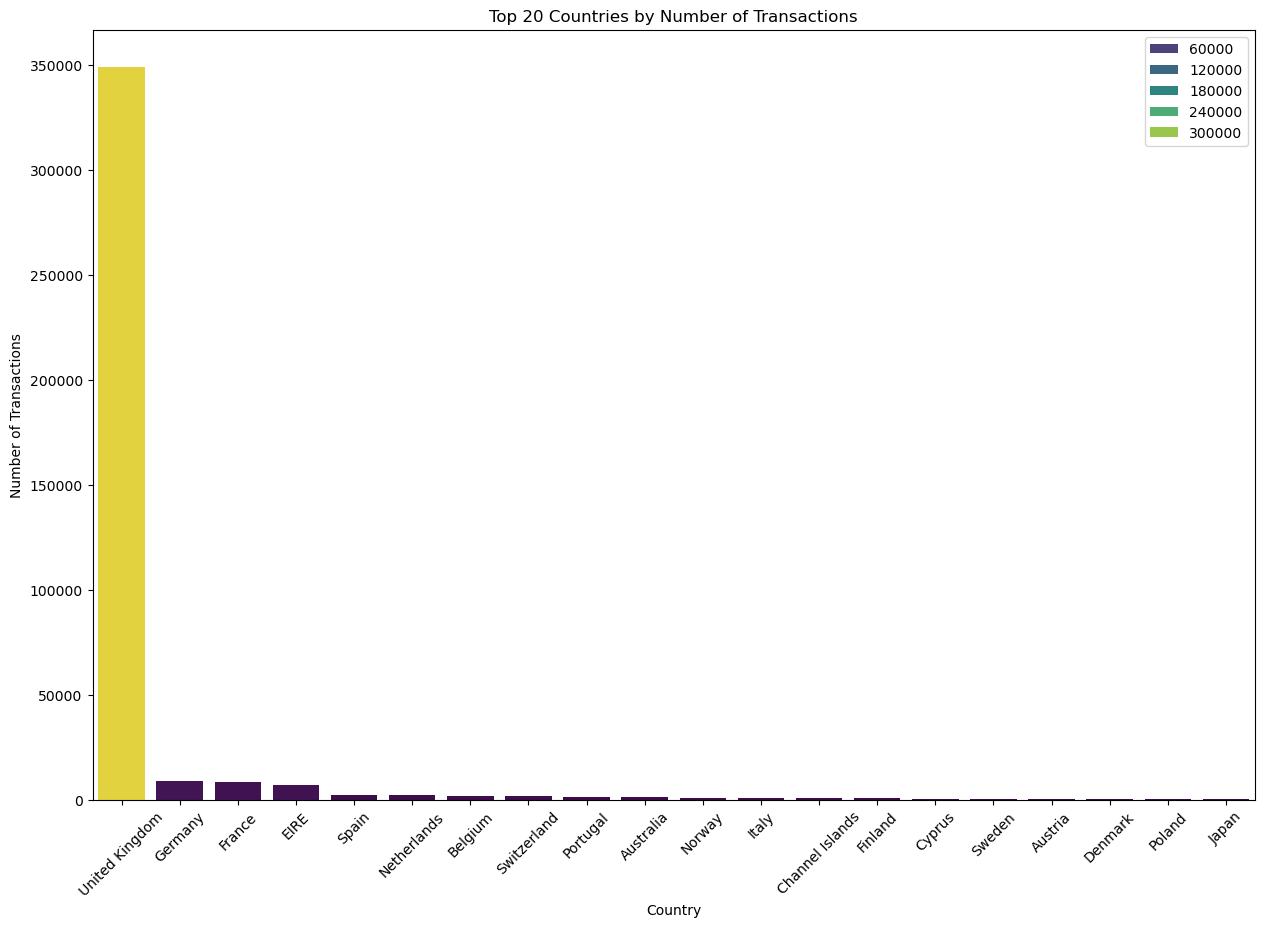

In [74]:
top_20_countries = copyy_data['Country'].value_counts().head(20)
plt.figure(figsize=(15,10))
sns.barplot(x=top_20_countries.index, y=top_20_countries.values, palette='viridis', hue=top_20_countries.values)
plt.xticks(rotation=45)
plt.ylabel('Number of Transactions')
plt.title('Top 20 Countries by Number of Transactions')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_36116\1783726397.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales_2011['Monthes'], y=monthly_sales_2011['total_price'], palette='tab10')


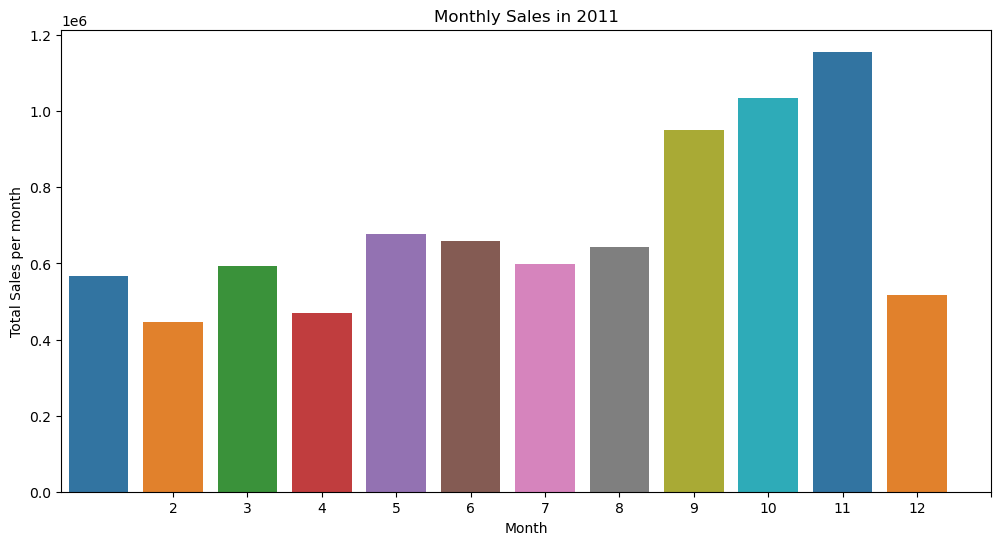

In [82]:
data["Monthes"] = data['InvoiceDate'].dt.month
monthly_sales_2011 = data[data['InvoiceDate'].dt.year == 2011].groupby('Monthes')['total_price'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x=monthly_sales_2011['Monthes'], y=monthly_sales_2011['total_price'], palette='tab10')
plt.xticks(range(1,13))
plt.ylabel('Total Sales per month')
plt.xlabel('Month')
plt.title('Monthly Sales in 2011')
plt.show()

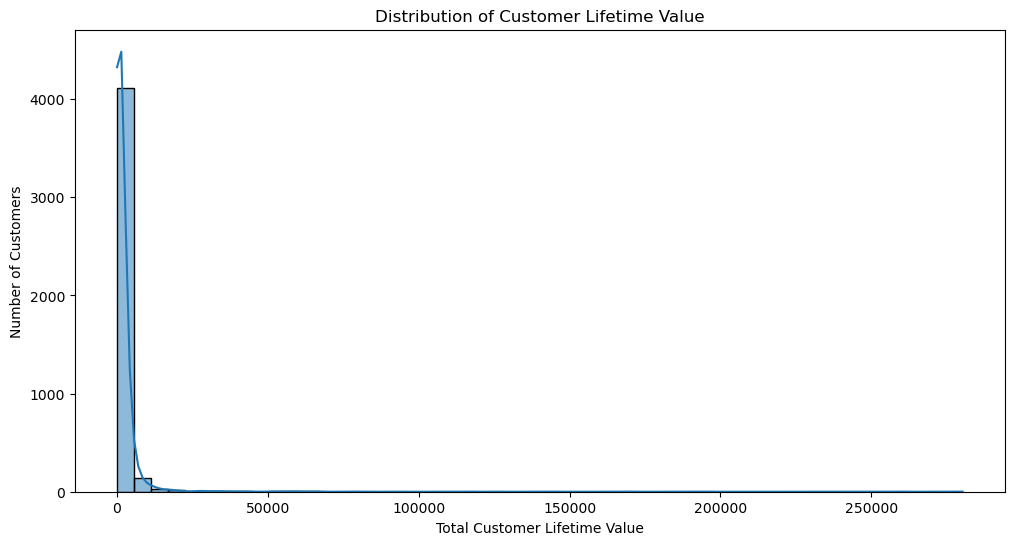

In [87]:
clv = copyy_data.groupby('CustomerID')['total_price'].sum().reset_index()
clv.sort_values(ascending=False, by='total_price', inplace=True)
plt.figure(figsize=(12,6))
sns.histplot(clv['total_price'], bins=50, kde=True)
plt.xlabel('Total Customer Lifetime Value')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Lifetime Value')
plt.show()

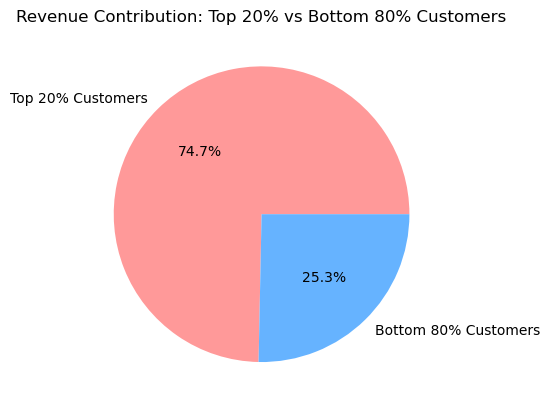

In [102]:
top_20percent_customers = clv.head(int(0.2 * len(clv)))
buttom_80percent_customers = clv.tail(int(0.8 * len(clv)))
top_20percent_revenue = top_20percent_customers['total_price'].sum()
buttom_80percent_revenue = buttom_80percent_customers['total_price'].sum()
plt.pie([top_20percent_revenue, buttom_80percent_revenue], labels=['Top 20% Customers', 'Bottom 80% Customers'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Revenue Contribution: Top 20% vs Bottom 80% Customers')
plt.show()

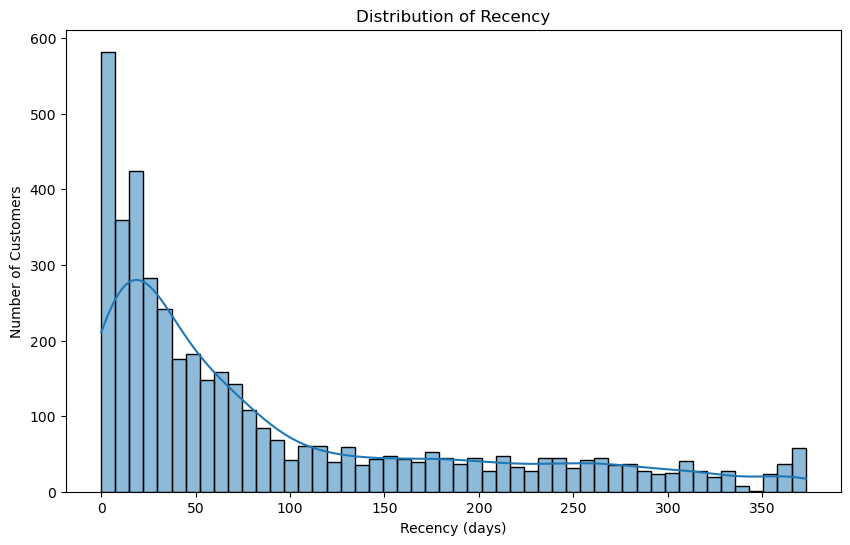

In [107]:
plt.figure(figsize=(10,6))
sns.histplot(rfm['Recency'], bins=50, kde=True)
plt.xlabel('Recency (days)')
plt.ylabel('Number of Customers')
plt.title('Distribution of Recency')
plt.show()

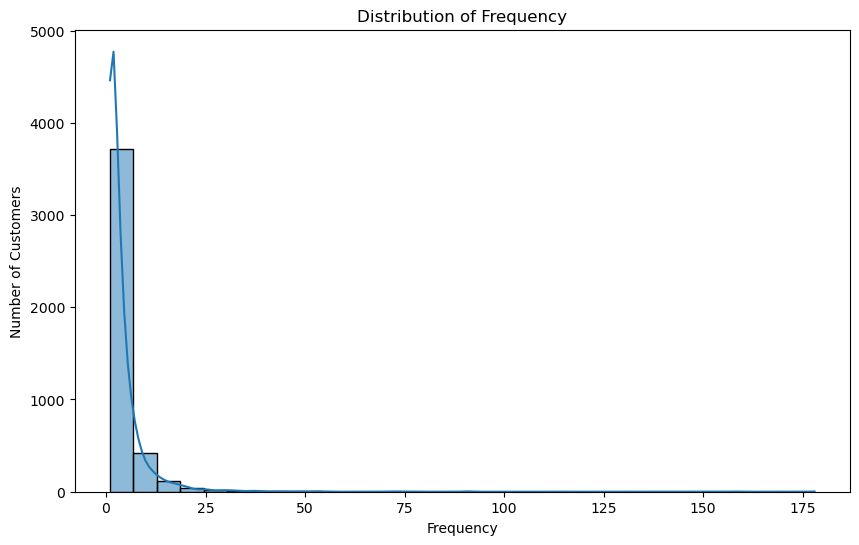

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(rfm["Frequency"], bins=30, kde=True)
plt.xlabel('Frequency')
plt.ylabel('Number of Customers')
plt.title('Distribution of Frequency')
plt.show()

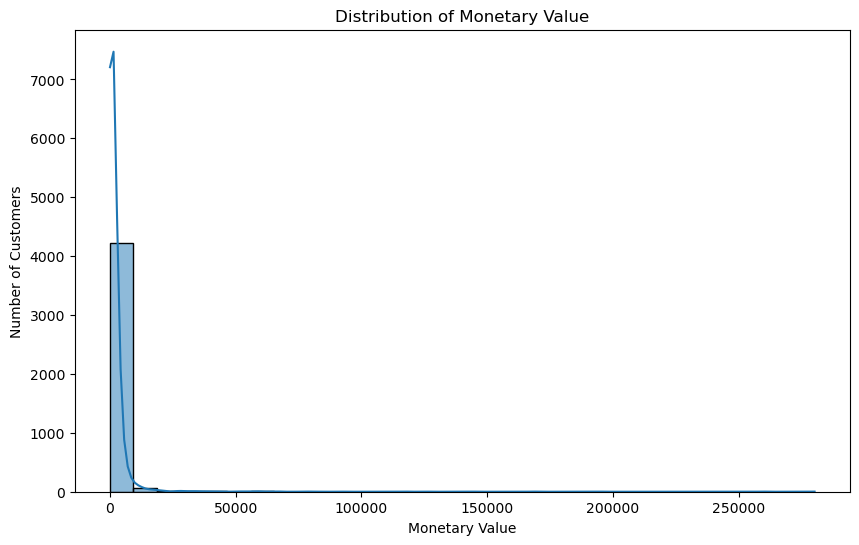

In [117]:
plt.figure(figsize=(10,6))
sns.histplot(rfm["Monetary"], bins=30, kde=True)
plt.xlabel('Monetary Value')
plt.ylabel('Number of Customers')
plt.title('Distribution of Monetary Value')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_36116\3327119399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products_by_quantity, x="Quantity", y= "Description", palette='magma')


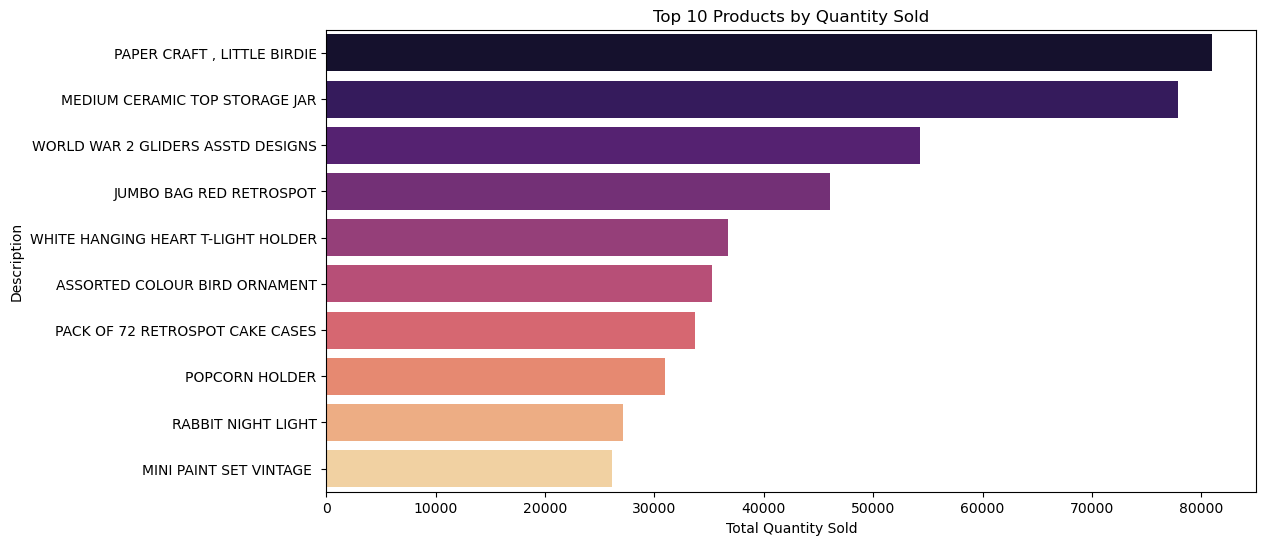

In [124]:
top_10_products_by_quantity = copyy_data.groupby(["StockCode", "Description"])["Quantity"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_products_by_quantity, x="Quantity", y= "Description", palette='magma')
plt.xlabel('Total Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_36116\404780863.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products_by_revenue, x="total_price", y= "Description", palette='coolwarm')


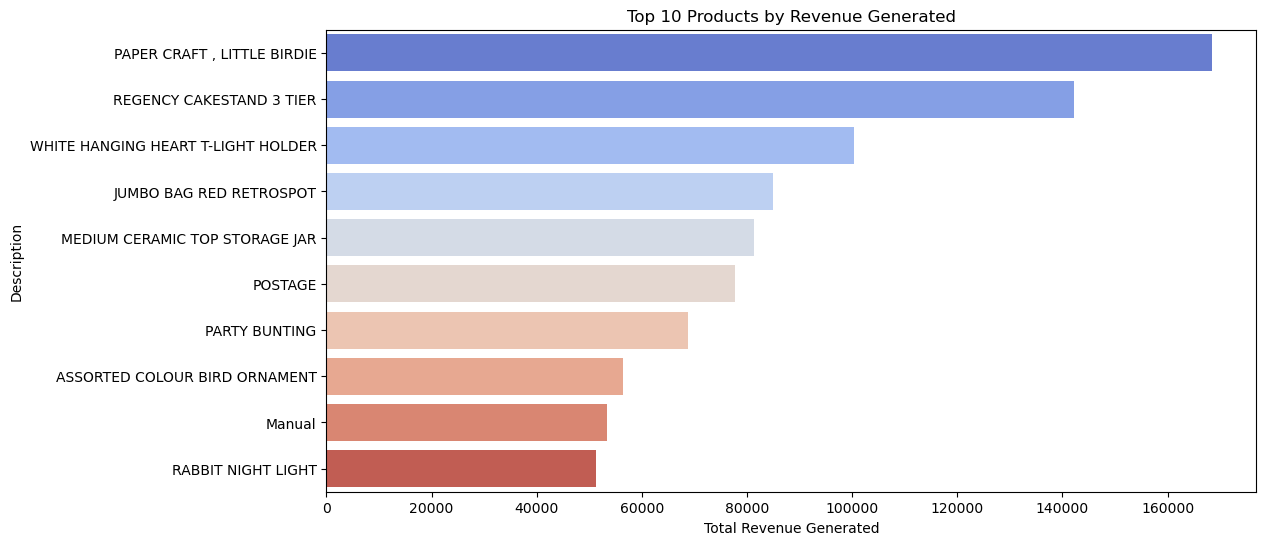

In [127]:
top_10_products_by_revenue = copyy_data.groupby(["StockCode", "Description"])["total_price"].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_products_by_revenue, x="total_price", y= "Description", palette='coolwarm')
plt.xlabel('Total Revenue Generated')
plt.title('Top 10 Products by Revenue Generated')
plt.show()

In [129]:
copyy_data["cohortMonth"] = copyy_data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
copyy_data["cohortIndex"] = copyy_data["InvoiceDate"].dt.to_period('M') - copyy_data["cohortMonth"]

In [ ]:
copyy_data["cohortIndex"] = copyy_data["cohortIndex"].apply(lambda x: x.n)
copyy_data["cohortIndex"]

36521     0
10256     0
10257     0
10258     0
10259     0
         ..
281420    5
281421    5
306649    5
306650    5
306651    5
Name: cohortIndex, Length: 392692, dtype: int64

In [135]:
cohort_data = copyy_data.groupby(['cohortMonth', 'cohortIndex'])["CustomerID"].nunique().reset_index()
cohort_matrix = cohort_data.pivot(index='cohortMonth', columns='cohortIndex', values='CustomerID')
cohort_matrix

cohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
cohortMonth,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Cohort Analysis - Customer Retention')

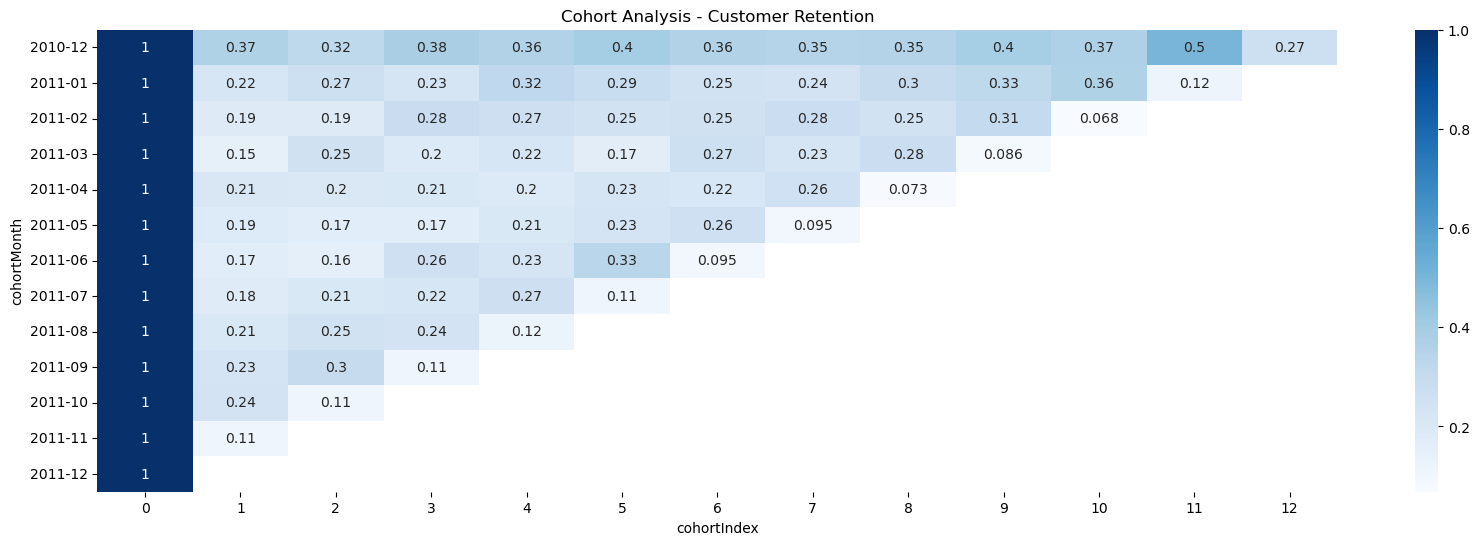

In [143]:
retention_matrix = cohort_matrix.divide(cohort_matrix.iloc[:,0], axis=0)
plt.figure(figsize=(20,6))
sns.heatmap(retention_matrix, annot=True,cmap='Blues')
plt.title('Cohort Analysis - Customer Retention')

In [145]:
spendings_per_country = copyy_data.groupby('Country')['total_price'].sum().sort_values(ascending=False).reset_index()
spendings_per_country

,Country,total_price
0,United Kingdom,7285024.644
1,Netherlands,285446.340
2,EIRE,265262.460
3,Germany,228678.400
4,France,208934.310
5,Australia,138453.810
6,Spain,61558.560
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38367.830


C:\Users\Asus\AppData\Local\Temp\ipykernel_36116\4142724745.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spendings_per_country['Country'].head(10), y=spendings_per_country['total_price'].head(10), palette='Set2')


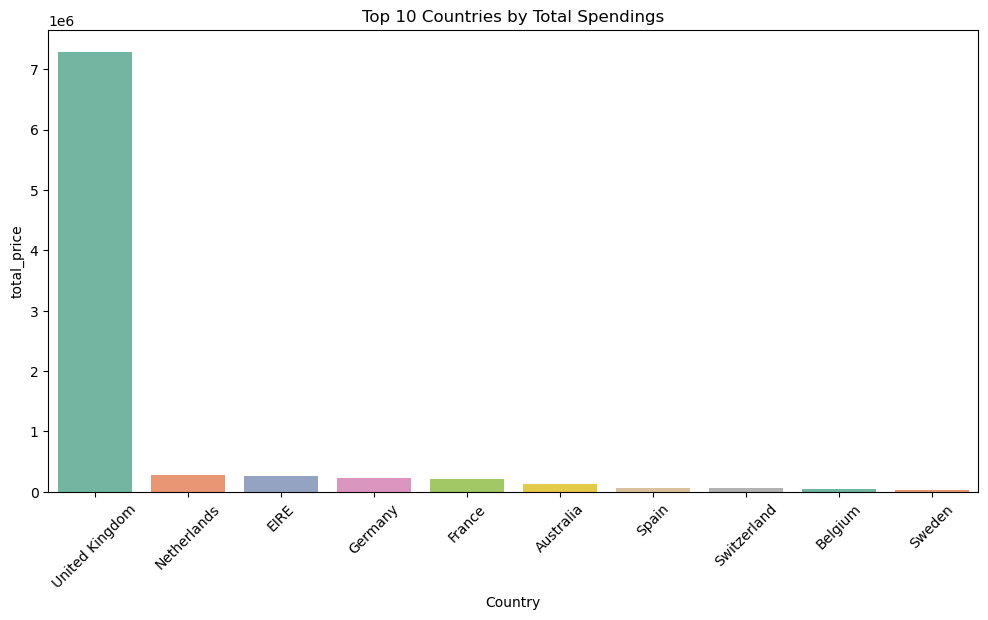

In [149]:
plt.figure(figsize=(12,6))
sns.barplot(x=spendings_per_country['Country'].head(10), y=spendings_per_country['total_price'].head(10), palette='Set2')
plt.xlabel('Country')
plt.title('Top 10 Countries by Total Spendings')
plt.xticks(rotation=45)
plt.show()